In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ROOT = os.path.join("/home", "niche", "cowsformer")
DIR_OUT = os.path.join(ROOT, "out", "yolov8")
RUNS = ["run_%d" % i for i in range(8)]

In [3]:
data = pd.read_csv(os.path.join(DIR_OUT, RUNS[0], "results.csv"))
for i in range(1, len(RUNS)):
    data_new = pd.read_csv(os.path.join(DIR_OUT, RUNS[i], "results.csv"))
    data = pd.concat([data, data_new])
data

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.1134,0.2580,0.5766,0.2271,0.3258,709,635,5,1a_angle_t2s,yolov8n,16
1,0.1090,0.2365,0.5080,0.2214,0.3084,709,512,336,1a_angle_t2s,yolov8n,32
2,0.1209,0.2427,0.5132,0.2186,0.3066,709,545,109,1a_angle_t2s,yolov8n,64
3,0.1445,0.2896,0.4784,0.2595,0.3365,709,499,235,1a_angle_t2s,yolov8n,128
4,0.1472,0.2913,0.5140,0.2694,0.3535,709,486,272,1a_angle_t2s,yolov8n,256
...,...,...,...,...,...,...,...,...,...,...,...
32,0.1418,0.3120,0.4768,0.2821,0.3545,709,492,223,1a_angle_t2s,yolov8x,128
33,0.1702,0.3238,0.5835,0.2707,0.3698,709,515,117,1a_angle_t2s,yolov8x,256
34,0.1847,0.3432,0.5018,0.2934,0.3703,709,502,107,1a_angle_t2s,yolov8x,500
35,0.1436,0.2352,0.5258,0.2122,0.3024,721,702,9,1b_angle_s2t,yolov8x,16


In [4]:
data.query("config=='1a_angle_t2s' and n==16 and model == 'yolov8m'")

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
29,0.1129,0.2354,0.4967,0.2426,0.3260,709,526,171,1a_angle_t2s,yolov8m,16
29,0.1362,0.2761,0.3857,0.2891,0.3305,709,464,422,1a_angle_t2s,yolov8m,16
29,0.1191,0.2364,0.5380,0.2300,0.3222,709,521,268,1a_angle_t2s,yolov8m,16
29,0.1000,0.2154,0.3659,0.2426,0.2917,709,452,1354,1a_angle_t2s,yolov8m,16
0,0.1177,0.2503,0.4521,0.2440,0.3170,709,480,464,1a_angle_t2s,yolov8m,16
0,0.0674,0.1534,0.2272,0.2327,0.2299,709,516,693,1a_angle_t2s,yolov8m,16
0,0.1419,0.3015,0.4979,0.3004,0.3747,709,410,854,1a_angle_t2s,yolov8m,16
0,0.1382,0.2661,0.5716,0.2384,0.3364,709,495,316,1a_angle_t2s,yolov8m,16


<AxesSubplot: xlabel='n', ylabel='map50'>

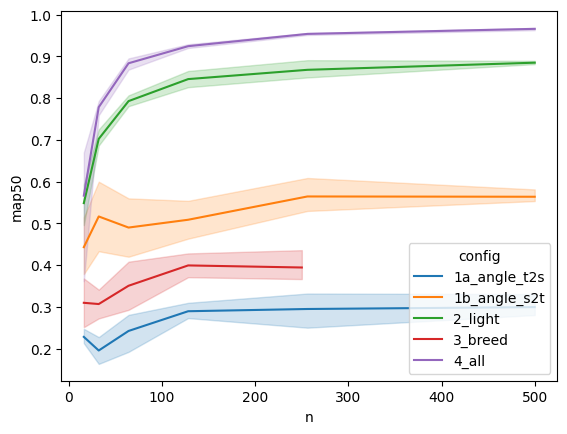

In [5]:
sns.lineplot(data=data.query("model == 'yolov8n'"), x="n", y="map50", hue="config",)

In [6]:
data_long = data.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
data_long

,model,config,n,metric,value
0,yolov8n,1a_angle_t2s,16,map5095,0.1134
1,yolov8n,1a_angle_t2s,32,map5095,0.1090
2,yolov8n,1a_angle_t2s,64,map5095,0.1209
3,yolov8n,1a_angle_t2s,128,map5095,0.1445
4,yolov8n,1a_angle_t2s,256,map5095,0.1472
...,...,...,...,...,...
3051,yolov8x,1a_angle_t2s,128,n_fp,223.0000
3052,yolov8x,1a_angle_t2s,256,n_fp,117.0000
3053,yolov8x,1a_angle_t2s,500,n_fp,107.0000
3054,yolov8x,1b_angle_s2t,16,n_fp,9.0000


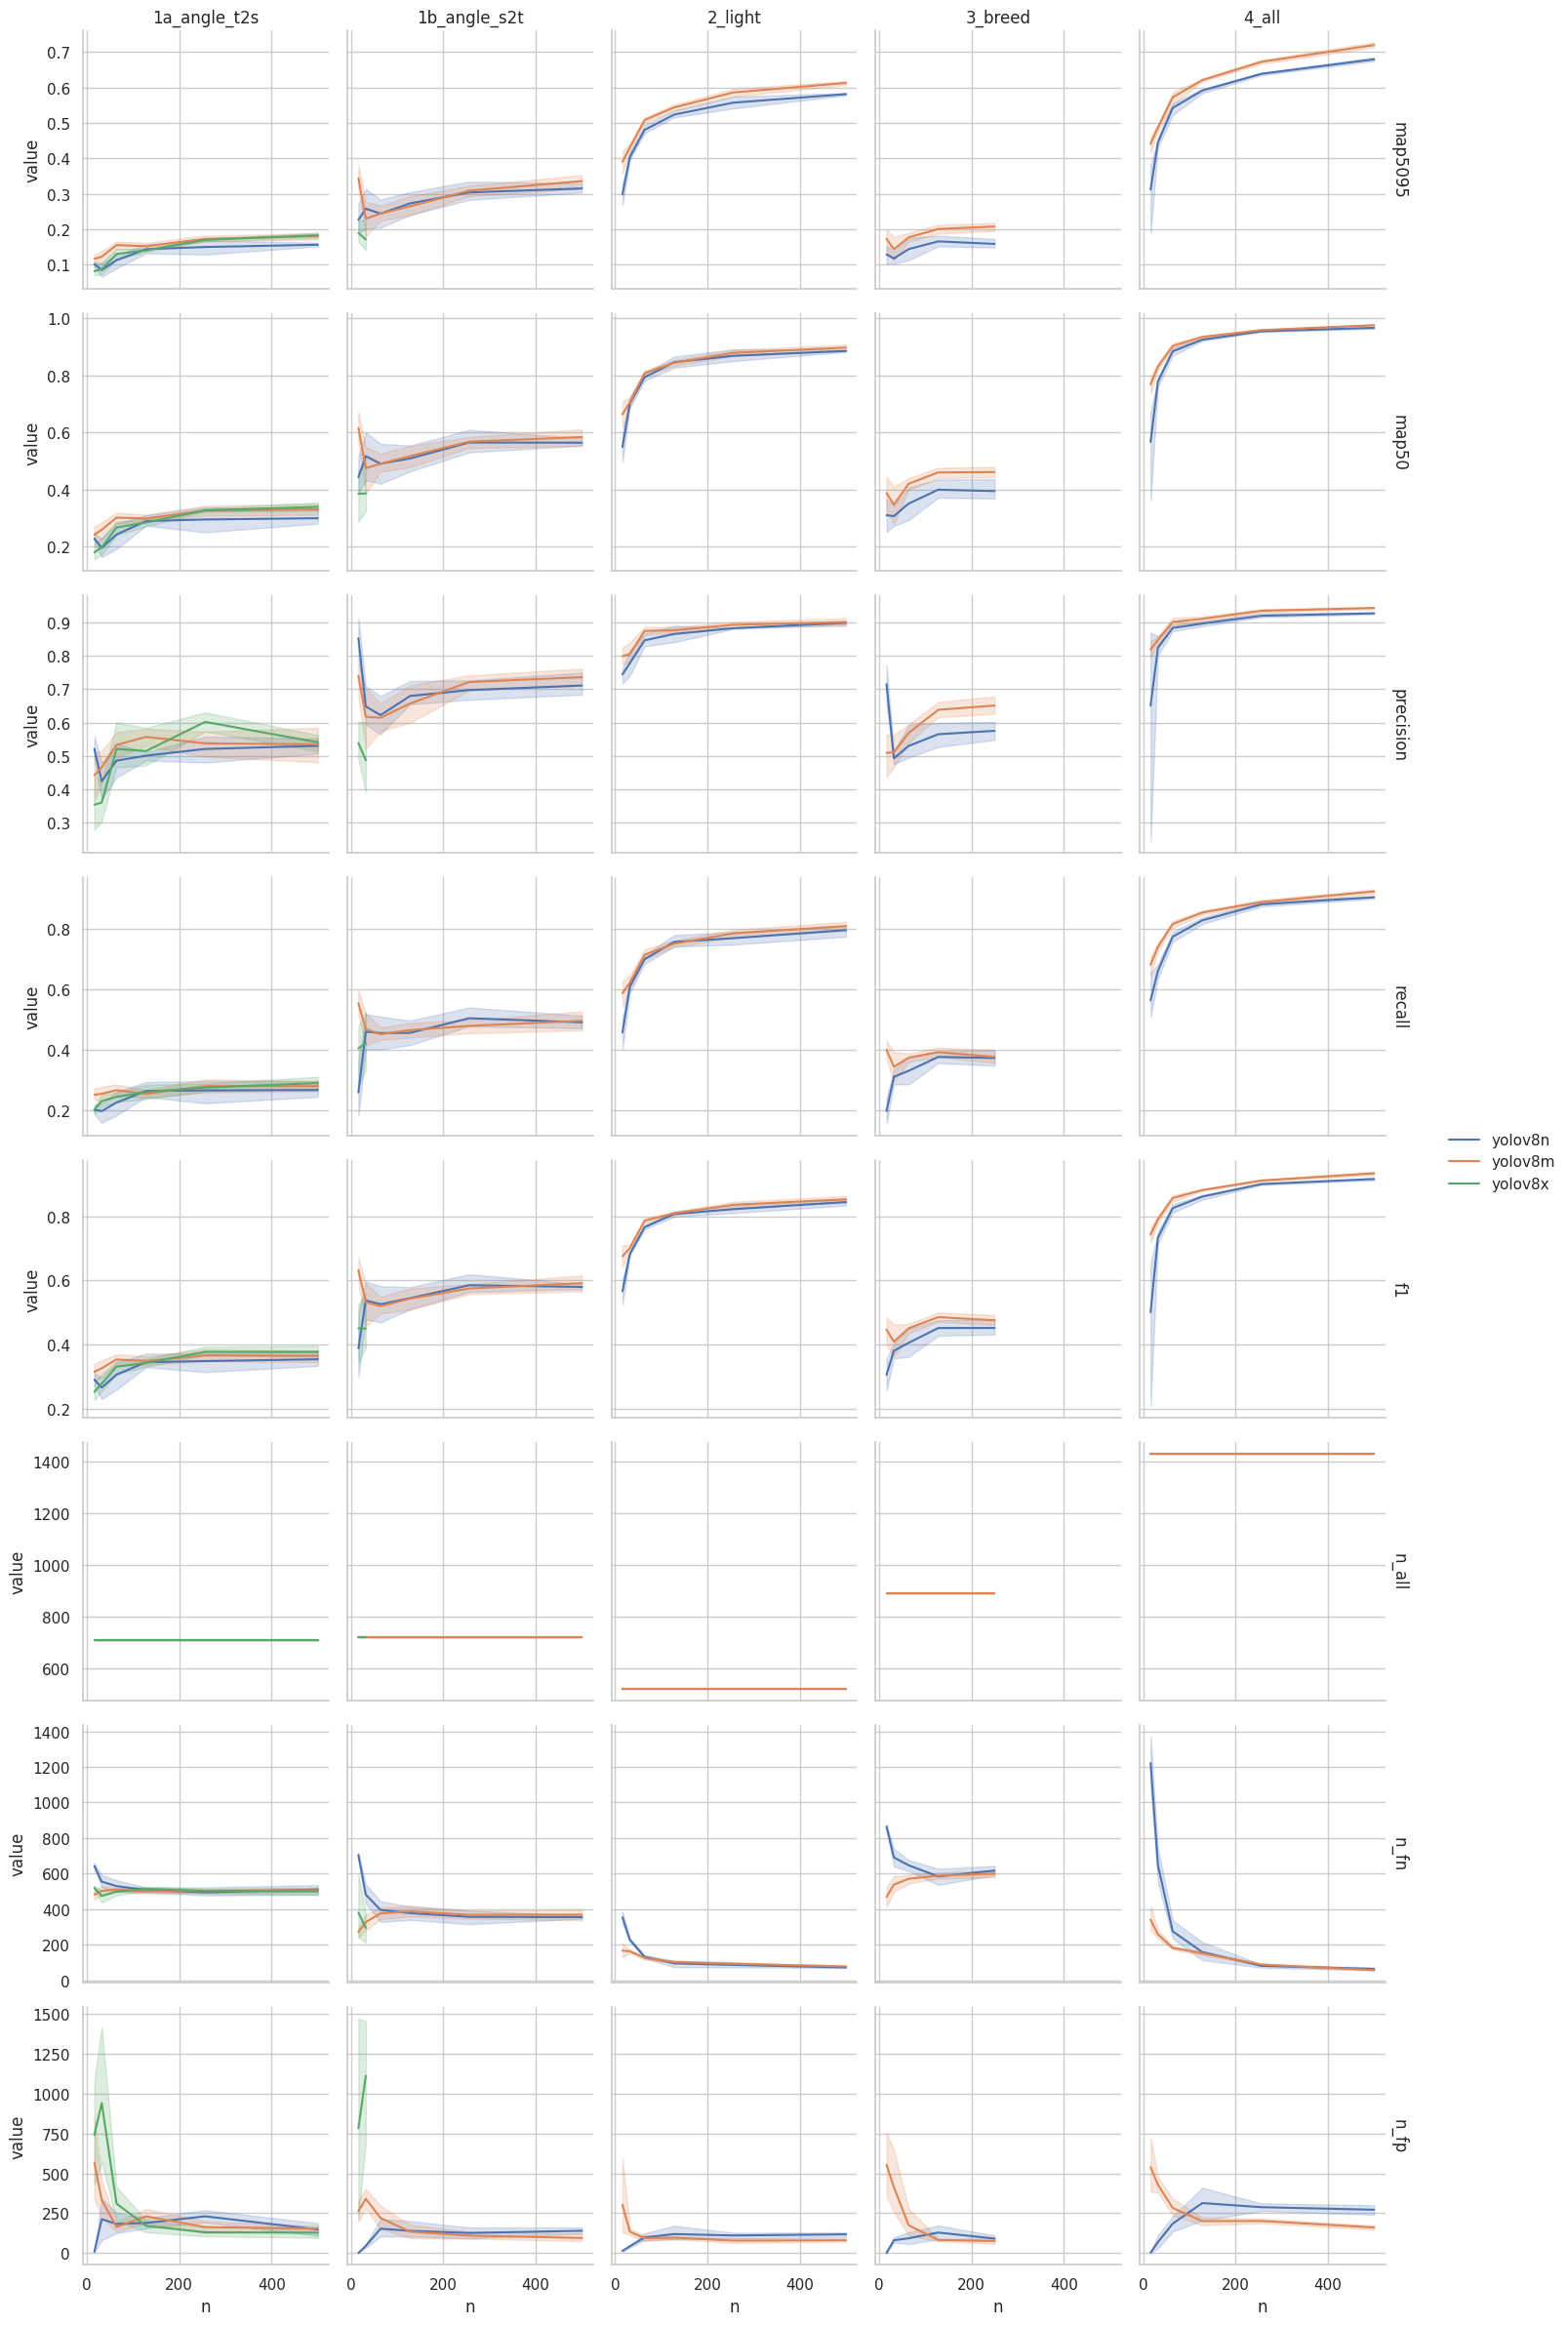

In [7]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
plt.show()
